In [17]:
using Posets
using DelimitedFiles
import LinearAlgebra: norm
using Plots
using Statistics: mean
using Colors

funciones

In [23]:
function norma_diferenciapos(lista1, lista2)
    pos1 = [posicionpromedio(lista1, x) for x in 1:10]
    pos2 = [posicionpromedio(lista2, x) for x in 1:10]
    norm(pos1-pos2)
end

norma_diferenciapos (generic function with 1 method)

In [1]:
"""
```
ruido(ll, mm, nn)
```
ll: lista de rankings
mm: numero de rankings (de la lista) a perturbar
nn: numero de transposiciones adyacentes aleatorias por ranking
"""
function ruido(ll, mm, nn)

    cc = deepcopy(ll)
    n = ll[1] |> length
    m = length(ll)
    for i in rand(1:m, mm)
        for pasos in 1:nn
            q = rand(1:n-1)
            tmp = cc[i][q]
            cc[i][q] = cc[i][q+1]
            cc[i][q+1] = tmp
        end
    end
    cc
end

ruido

# Introduccion

El experimento que se hace aqui es de la siguiente forma
1. Se obtiene un poset aleatorio P
2. Se calcula una serie de extensiones lineales (EL) aleatorias de P
3. Con estas EL se calculan las puntucaciones
4. Con las puntuaciones, se calculan los cortes $\alpha$
5. Con los cortes $\alpha$ se calculan nuevas ELs
6. Con estas ELs se obtiene la norma entre el vector de posiciones promedio

In [5]:
posetrandom = Array( caminata_poset(10,10^2) )

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  1  0
 0  1  0  1  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  0  1  0  0  1  0  0  0
 0  0  0  1  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  1  1  0  0  1  0  0  0

In [138]:
#writedlm("poset_original.dat", posetrandom)

In [5]:
posetrandom = readdlm("poset_original.dat",Int)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  1  0
 0  1  0  1  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  0  1  0  0  1  0  0  0
 0  0  0  1  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  1  1  0  0  1  0  0  0

Se calcula una lista de extensiones lineales

In [6]:
lista_extensioneslineales = [caminatale(posetrandom, 10^2) for _ in 1:10^3]|>unique!

67-element Array{Array{Int64,1},1}:
 [10, 8, 6, 5, 3, 4, 2, 7, 1, 9]
 [8, 10, 6, 5, 3, 1, 2, 4, 9, 7]
 [10, 8, 6, 5, 3, 2, 4, 7, 1, 9]
 [10, 6, 8, 5, 3, 4, 2, 7, 1, 9]
 [6, 8, 10, 5, 3, 4, 2, 7, 1, 9]
 [10, 8, 6, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 4, 1, 2, 7, 9]
 [10, 6, 8, 5, 3, 2, 1, 4, 7, 9]
 [10, 6, 8, 5, 3, 4, 2, 1, 7, 9]
 [10, 6, 5, 8, 3, 4, 2, 7, 1, 9]
 [6, 8, 5, 10, 3, 4, 2, 7, 1, 9]
 [6, 10, 5, 3, 1, 2, 7, 8, 9, 4]
 [6, 5, 10, 1, 3, 2, 8, 9, 7, 4]
 ⋮
 [10, 3, 6, 8, 5, 1, 4, 2, 9, 7]
 [10, 3, 6, 5, 8, 1, 2, 4, 9, 7]
 [10, 3, 2, 8, 6, 5, 4, 1, 7, 9]
 [8, 6, 5, 10, 1, 3, 4, 2, 7, 9]
 [6, 8, 10, 3, 5, 4, 2, 7, 1, 9]
 [6, 10, 8, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 3, 5, 2, 4, 7, 1, 9]
 [10, 3, 6, 5, 2, 1, 8, 7, 4, 9]
 [10, 3, 6, 5, 8, 2, 1, 7, 4, 9]
 [8, 6, 10, 3, 5, 4, 2, 7, 1, 9]
 [10, 3, 6, 5, 2, 8, 1, 7, 4, 9]
 [6, 8, 5, 10, 3, 4, 2, 1, 7, 9]

In [7]:
puntuaciones_preposet = mn(lista_extensioneslineales)
poset_mn_old = puntuaciones_preposet |> fuzzy

10×10 Array{Float64,2}:
 1.0       0.820498  0.458268  0.830292  …  0.32882   1.0       0.175095
 0.93731   1.0       0.52833   0.922593     0.371038  1.0       0.200023
 0.990877  1.0       1.0       1.0          0.512551  1.0       0.378594
 0.859762  0.836281  0.478903  1.0          0.349277  0.989858  0.18131
 1.0       0.984027  0.725738  1.0          0.547633  1.0       0.317891
 1.0       0.987222  0.84557   1.0       …  0.755045  1.0       0.471885
 0.832783  0.767028  0.405244  0.806755     0.294017  0.986613  0.153423
 0.974846  0.962921  0.702773  1.0          1.0       1.0       0.40728
 0.749631  0.656208  0.346695  0.716593     0.252854  1.0       0.131257
 1.0       1.0       1.0       1.0          0.784587  1.0       1.0

In [8]:
writedlm("figs/tmp_x1_actual.dat", posetrandom)

In [9]:
;./script.wl figs/tmp_x1_actual.dat

figs/tmp_x1_actual.png


![ejemplo](figs/tmp_x1_actual.png)

In [10]:
writedlm("figs/tmp_x1_0p95.dat", αcut_poset(poset_mn_old, .95))

In [11]:
;./script.wl figs/tmp_x1_0p95.dat

figs/tmp_x1_0p95.png


![ejemplo](figs/tmp_x1_0p95.png)

In [25]:
writedlm("figs/tmp_x1_0p75.dat", αcut_poset(poset_mn_old, .75))

In [26]:
;./script.wl figs/tmp_x1_0p75.dat

figs/tmp_x1_0p75.png


![ejemplo](figs/tmp_x1_0p75.png)

Encontrando posiciones promedio

In [36]:
listaextensiones = [caminatale(αcut_poset(poset_mn_old, .75), 10^2) for _ in 1:10^3] |> unique!

35-element Array{Array{Int64,1},1}:
 [10, 8, 6, 5, 3, 4, 2, 7, 1, 9]
 [8, 10, 6, 5, 3, 4, 2, 7, 1, 9]
 [10, 8, 6, 3, 5, 4, 2, 7, 1, 9]
 [6, 8, 10, 5, 3, 4, 2, 7, 1, 9]
 [6, 8, 10, 5, 3, 2, 4, 1, 7, 9]
 [10, 3, 6, 5, 8, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 2, 4, 7, 1, 9]
 [10, 6, 5, 8, 3, 4, 2, 7, 1, 9]
 [10, 6, 8, 5, 3, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 4, 2, 1, 7, 9]
 [10, 8, 3, 6, 5, 4, 2, 1, 7, 9]
 [8, 6, 10, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 3, 5, 4, 2, 1, 7, 9]
 ⋮
 [8, 10, 6, 5, 3, 2, 1, 4, 7, 9]
 [10, 6, 8, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 1, 2, 4, 7, 9]
 [8, 6, 10, 5, 3, 2, 4, 7, 1, 9]
 [10, 6, 8, 5, 3, 2, 4, 7, 1, 9]
 [10, 8, 6, 3, 5, 2, 4, 1, 7, 9]
 [6, 10, 8, 3, 5, 4, 2, 7, 1, 9]
 [8, 6, 10, 3, 5, 2, 4, 7, 1, 9]
 [8, 10, 6, 5, 3, 1, 2, 4, 7, 9]
 [6, 8, 10, 5, 3, 2, 1, 4, 7, 9]
 [10, 6, 3, 5, 8, 1, 4, 2, 7, 9]
 [10, 8, 6, 5, 3, 2, 4, 1, 7, 9]

In [59]:
listaextensiones_v2 = [caminatale(αcut_poset(poset_mn_old, .95), 10^2) for _ in 1:10^3] |> unique!

29-element Array{Array{Int64,1},1}:
 [10, 8, 6, 5, 3, 4, 2, 7, 1, 9]
 [10, 6, 8, 5, 3, 4, 2, 7, 1, 9]
 [8, 10, 6, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 4, 2, 1, 7, 9]
 [6, 8, 10, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 4, 1, 2, 7, 9]
 [8, 10, 6, 5, 3, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 2, 4, 7, 1, 9]
 [10, 3, 6, 5, 8, 4, 2, 7, 1, 9]
 [10, 6, 5, 8, 3, 4, 2, 7, 1, 9]
 [8, 10, 6, 5, 3, 2, 4, 7, 1, 9]
 [10, 8, 6, 3, 5, 4, 2, 7, 1, 9]
 [6, 8, 10, 5, 3, 4, 2, 7, 1, 9]
 ⋮
 [10, 8, 6, 3, 5, 4, 2, 1, 7, 9]
 [10, 6, 8, 3, 5, 4, 2, 7, 1, 9]
 [6, 8, 10, 3, 5, 1, 2, 4, 7, 9]
 [8, 10, 6, 5, 3, 4, 2, 1, 7, 9]
 [10, 3, 6, 8, 5, 4, 2, 1, 7, 9]
 [10, 6, 8, 3, 5, 2, 4, 7, 1, 9]
 [10, 3, 6, 8, 5, 4, 2, 7, 1, 9]
 [6, 8, 10, 5, 3, 2, 4, 7, 1, 9]
 [10, 8, 3, 6, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 1, 2, 4, 7, 9]
 [6, 8, 10, 5, 3, 2, 1, 4, 7, 9]
 [10, 6, 3, 5, 8, 4, 2, 7, 1, 9]

In [37]:
[posicionpromedio(listaextensiones, x) for x in 1:10]

10-element Array{Float64,1}:
  8.285714285714285
  6.685714285714286
  4.3428571428571425
  6.6
  4.257142857142857
  2.314285714285714
  8.428571428571427
  2.4000000000000004
 10.0
  1.6857142857142855

In [38]:
[posicionpromedio(listaextensiones, x)|>round for x in 1:10]

10-element Array{Float64,1}:
  8.0
  7.0
  4.0
  7.0
  4.0
  2.0
  8.0
  2.0
 10.0
  2.0

In [ ]:
# [posicionpromedio(listaextensiones_v2, x)|>round for x in 1:10]

In [39]:
[posicionpromedio(lista_extensioneslineales, x)|>round for x in 1:10]

10-element Array{Float64,1}:
  8.0
  6.0
  4.0
  7.0
  4.0
  2.0
  8.0
  3.0
 10.0
  2.0

In [32]:
[posicionpromedio(lista_extensioneslineales, x) for x in 1:10]

10-element Array{Float64,1}:
 7.9107142857142865
 6.446428571428571
 3.964285714285714
 7.25
 4.267857142857142
 2.392857142857143
 8.357142857142856
 3.0892857142857144
 9.732142857142858
 1.5892857142857142

In [37]:
[posicionpromedio(listaextensiones, x) for x in 1:10]

10-element Array{Float64,1}:
  8.285714285714285
  6.685714285714286
  4.3428571428571425
  6.6
  4.257142857142857
  2.314285714285714
  8.428571428571427
  2.4000000000000004
 10.0
  1.6857142857142855

## Con ruido

#### Un ejemplo para ver que funciona

In [45]:
listarankejemplo = [
    [1,2,3],
    [1,3,2]
]

2-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [1, 3, 2]

In [56]:
ruido(listarankejemplo, 1, 1)

2-element Array{Array{Int64,1},1}:
 [1, 3, 2]
 [1, 3, 2]

#### Un ejemplo para ver que funciona

Aqui deberian de ir las extensiones lineales del poset original

In [88]:
ruido_v1= ruido(lista_extensioneslineales, 2, 5) |> unique!

56-element Array{Array{Int64,1},1}:
 [10, 8, 6, 5, 3, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 4, 2, 1, 7, 9]
 [6, 10, 3, 8, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 3, 5, 4, 2, 7, 1, 9]
 [10, 3, 6, 5, 8, 1, 2, 7, 4, 9]
 [6, 8, 10, 5, 3, 4, 2, 7, 1, 9]
 [10, 6, 8, 3, 5, 4, 2, 7, 1, 9]
 [10, 3, 6, 5, 8, 4, 2, 7, 1, 9]
 [10, 3, 6, 2, 8, 5, 4, 7, 1, 9]
 [8, 6, 10, 5, 3, 1, 4, 2, 9, 7]
 [10, 8, 6, 5, 3, 1, 2, 7, 4, 9]
 [10, 6, 8, 5, 3, 4, 2, 7, 1, 9]
 [8, 6, 5, 3, 10, 2, 4, 7, 1, 9]
 ⋮
 [10, 3, 6, 8, 5, 1, 2, 4, 7, 9]
 [10, 6, 5, 8, 3, 4, 2, 7, 1, 9]
 [8, 6, 10, 3, 5, 1, 2, 9, 7, 4]
 [10, 3, 8, 6, 5, 4, 2, 7, 1, 9]
 [6, 10, 3, 8, 2, 5, 1, 9, 7, 4]
 [10, 6, 3, 2, 5, 1, 7, 8, 9, 4]
 [6, 5, 10, 8, 3, 4, 2, 7, 1, 9]
 [6, 8, 5, 10, 3, 2, 7, 4, 1, 9]
 [6, 10, 8, 5, 3, 1, 2, 4, 7, 9]
 [10, 3, 8, 5, 2, 6, 1, 4, 9, 7]
 [6, 10, 3, 5, 8, 2, 1, 4, 9, 7]
 [10, 6, 5, 8, 3, 1, 2, 7, 4, 9]

In [94]:
puntuacionespreposet_ruidov1 = mn(ruido_v1)
poset_mn_old = puntuaciones_preposet |> fuzzy

10×10 Array{Float64,2}:
 1.0       0.777348  0.450627  0.803931  …  0.289063  1.0       0.169002
 0.947982  1.0       0.555868  0.923862     0.342374  1.0       0.206099
 0.988621  1.0       1.0       1.0          0.485034  1.0       0.370769
 0.875373  0.824891  0.49632   1.0          0.318741  0.983165  0.18402
 1.0       0.958944  0.709544  1.0          0.495027  1.0       0.307692
 1.0       1.0       0.865145  1.0       …  0.673567  1.0       0.480769
 0.858521  0.757753  0.421211  0.814083     0.26884   0.979317  0.156172
 0.987483  0.959078  0.755261  1.0          1.0       1.0       0.44272
 0.788567  0.646628  0.35944   0.712018     0.230835  1.0       0.133269
 1.0       1.0       1.0       1.0          0.766833  1.0       1.0

posiciones promedio

In [95]:
[posicionpromedio(lista_extensioneslineales, x) for x in 1:10]

10-element Array{Float64,1}:
 7.9107142857142865
 6.446428571428571
 3.964285714285714
 7.25
 4.267857142857142
 2.392857142857143
 8.357142857142856
 3.0892857142857144
 9.732142857142858
 1.5892857142857142

In [96]:
[posicionpromedio(ruido_v1, x) for x in 1:10]

10-element Array{Float64,1}:
 7.9107142857142865
 6.446428571428571
 3.946428571428571
 7.232142857142858
 4.196428571428572
 2.410714285714286
 8.357142857142856
 3.0892857142857144
 9.75
 1.6607142857142856

In [99]:
norma_diferenciapos(lista_extensioneslineales, ruido_v1)

0.10714285714285625

In [102]:
data1 = [norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 2, 5) |> unique!)) for _ in 1:10^2]

100-element Array{Float64,1}:
 0.0757614408414159
 0.11572751247156825
 0.07142857142857217
 0.08748177652797105
 0.10101525445522197
 0.10101525445522087
 0.07268232609257391
 0.056469243931578005
 0.06681531047810657
 0.08375742428256204
 0.0736505059829179
 0.11007882148158808
 0.07985957062499162
 ⋮
 0.050507627227610825
 0.0837574242825617
 0.11007882148159047
 0.05646924393157857
 0.0798595706249923
 0.07985957062499216
 0.12111303541295085
 0.0798595706249917
 0.11845088536983563
 0.061858957413174154
 0.09780759955449318
 0.10412414097938084

In [104]:
data2 = [norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 4, 5) |> unique!)) for _ in 1:10^2]

100-element Array{Float64,1}:
 0.15567496226930988
 0.16687911629614427
 0.15022401330811583
 0.07142857142857129
 0.10333554133771707
 0.16751484856512222
 0.11007882148158928
 0.10714285714285705
 0.10101525445522055
 0.12904363633122298
 0.16636457462970358
 0.1157275124715694
 0.08586296628693887
 ⋮
 0.13599594831899928
 0.09780759955449284
 0.11572751247156841
 0.06681531047810717
 0.12626906806902632
 0.12876968840942773
 0.08748177652797043
 0.10412414097937907
 0.09105391988558555
 0.08748177652797047
 0.1359959483189978
 0.13599594831899825

In [106]:
data3 = [norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 6, 5) |> unique!)) for _ in 1:10^2]

100-element Array{Float64,1}:
 0.18898223650461254
 0.1406072834644973
 0.17313142347915536
 0.12876968840942785
 0.16074084786399387
 0.1383208337931224
 0.16560033027670865
 0.10714285714285729
 0.1821078397711703
 0.12371791482634899
 0.13599594831899825
 0.10703950150659179
 0.08748177652796979
 ⋮
 0.1392103904342537
 0.17677669529663703
 0.1889822365046139
 0.14704674134090168
 0.2082482819587611
 0.1515228816828315
 0.1287696884094281
 0.14725377234348813
 0.12575375708562467
 0.16940773179473528
 0.15152288168283323
 0.17677669529663734

In [108]:
data1x = [norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 2, 10) |> unique!)) for _ in 1:10^2]

100-element Array{Float64,1}:
 0.07373061377055568
 0.06681531047810563
 0.1515228816828324
 0.13363062095621184
 0.07576144084141617
 0.0798595706249935
 0.11293848786315744
 0.05646924393157927
 0.08375742428255985
 0.13122266479195516
 0.10101525445522049
 0.12876968840942882
 0.07576144084141574
 ⋮
 0.09449111825230731
 0.10714285714285705
 0.09105391988558524
 0.11007882148158926
 0.10714285714285662
 0.12876968840942865
 0.08375742428256161
 0.1262690680690264
 0.12876968840942835
 0.11293848786315734
 0.07576144084141517
 0.07576144084141569

In [110]:
data2x = [norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 4, 10) |> unique!)) for _ in 1:10^2]

100-element Array{Float64,1}:
 0.1636634176769937
 0.15567496226930921
 0.21576867809990277
 0.13363062095621206
 0.1359959483189998
 0.17857142857142905
 0.10412414097938076
 0.09105391988558625
 0.18728729431609964
 0.1939782230571469
 0.2258769757263134
 0.16940773179473395
 0.13832083379312252
 ⋮
 0.15971914124998582
 0.15771001547014235
 0.21724151893922222
 0.1838505382319107
 0.15971914124998485
 0.14060728346449608
 0.27893748842523813
 0.21279241585380426
 0.21279241585380315
 0.15771001547013916
 0.19723858959263013
 0.22587697572631385

In [112]:
data3x = [norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 6, 10) |> unique!)) for _ in 1:10^2]

100-element Array{Float64,1}:
 0.2840599240987742
 0.18034830247075195
 0.20516295166207185
 0.18210783977117087
 0.29342279866348336
 0.18283631909912454
 0.23690177073967114
 0.11845088536983643
 0.17677669529663695
 0.29124118625535844
 0.20671137326411268
 0.15971914124998504
 0.17127969726116937
 ⋮
 0.2355518921120163
 0.21128856368212967
 0.21724151893922222
 0.2201576429631792
 0.16433639688415638
 0.18728729431609892
 0.13122105813792304
 0.19723858959262955
 0.1336306209562121
 0.2355518921120171
 0.2112885636821287
 0.18898223650461377

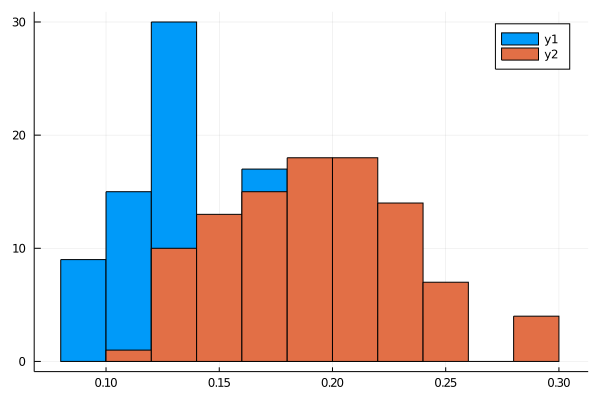

In [114]:
histogram([data3 data3x])

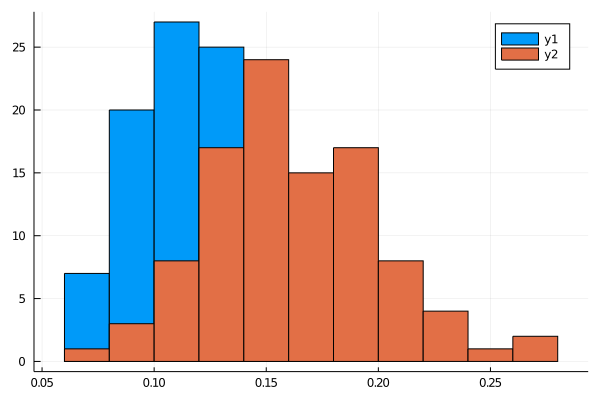

In [111]:
histogram([data2 data2x])

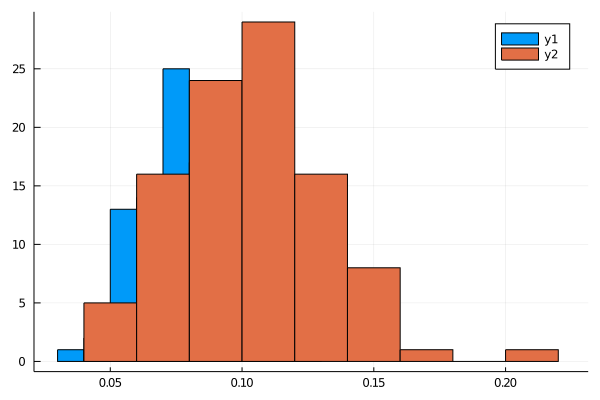

In [109]:
histogram([data1 data1x])

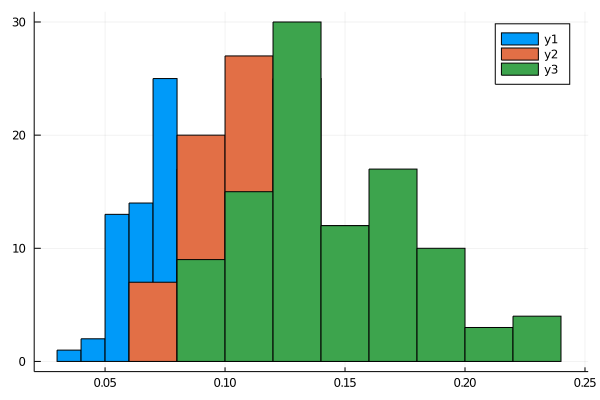

In [107]:
histogram([data1 data2 data3])

In [117]:
mean([norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, 6, 10) |> unique!)) for _ in 1:10^2])

0.19904586250172684

Se calcula la grafica

In [63]:
writedlm("figs/ruido_x1_0p95.dat", αcut_poset(poset_mn_old, .95))

In [64]:
;./script.wl figs/ruido_x1_0p95.dat

figs/ruido_x1_0p95.png


![ejemplo](figs/ruido_x1_0p95.png)

## colores

In [20]:
white_matrix = Array{RGB{Float64},2}(undef, 20, 20);

In [24]:
for i in 1:20, j in 1:20
 white_matrix[i,j] = RGB(mean([norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, i,j) |> unique!)) for _ in 1:10^2]),0,0)
end

In [26]:
white_matrix = zeros(Float64, 20,20);#Array{RGB{Float64},2}(undef, 20, 20);

In [27]:
for i in 1:20, j in 1:20
 white_matrix[i,j] =mean([norma_diferenciapos(lista_extensioneslineales, (ruido(lista_extensioneslineales, i,j) |> unique!)) for _ in 1:10^2])
end

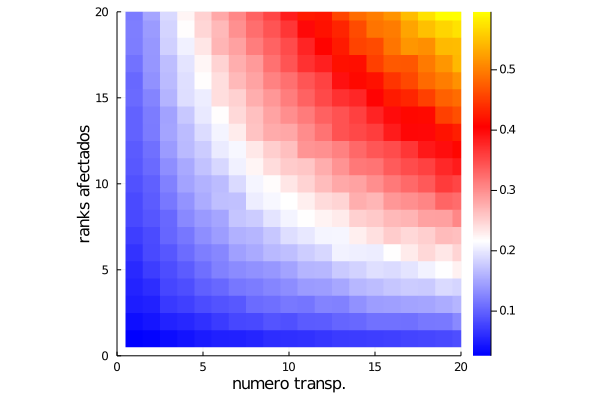

In [34]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,20),ylim=(0,20))